<a href="https://colab.research.google.com/github/nayanbisht/f1/blob/main/Pit_stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.6 MB/s eta 0:00:00


core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.2.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.2.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for sess

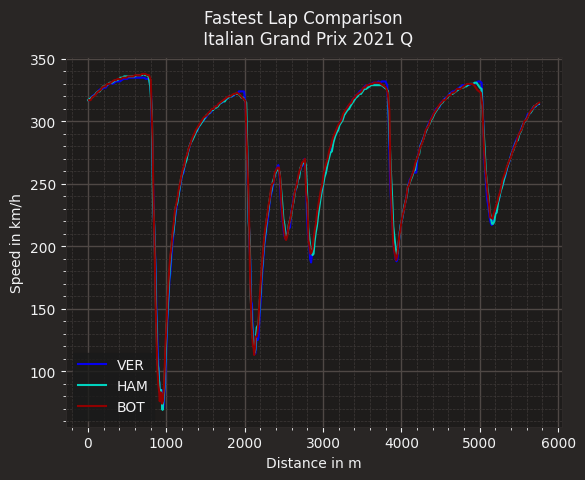

In [ ]:
import fastf1 as ff1
import matplotlib.pyplot as plt

def compare_drivers(season, race, session_type, driver_names):
    # Load the session data
    session = ff1.get_session(season, race, session_type)
    session.load()

    # Plotting
    fig, ax = plt.subplots()

    for driver_name in driver_names:
        # Retrieve Fastest Lap for each driver
        driver_lap = session.laps.pick_driver(driver_name).pick_fastest()

        # Get Telemetry Data
        driver_tel = driver_lap.get_car_data().add_distance()

        # Plot each driver's speed trace
        color = ff1.plotting.driver_color(driver_name)
        ax.plot(driver_tel['Distance'], driver_tel['Speed'], label=driver_name, color=color)

    ax.set_xlabel('Distance in m')
    ax.set_ylabel('Speed in km/h')

    ax.legend()
    plt.suptitle(f"Fastest Lap Comparison \n "
                 f"{session.event['EventName']} {session.event.year} {session_type}")

    plt.show()

# Example usage:
season_input = 2021
race_input = 'monza'
session_type_input = 'Q'
drivers_input = ['VER', 'HAM', 'BOT']  # Add more drivers as needed

compare_drivers(season_input, race_input, session_type_input, drivers_input)


In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [3]:
plotting.setup_mpl()

In [4]:
# Initial Parameters
year= 2023
gp = 'Brazil'
# Session name abbreviation:
# The code for the session to load Options are:
# 'FP1', 'FP2', 'FP3', 'Q', 'S', 'SS', and 'R'.
# Default is 'R', which refers to Race.
# full session name: 'Practice 1', 'Practice 2', 'Practice 3',
# 'Sprint', 'Sprint Shootout', 'Qualifying', 'Race';
event = 'Race'

In [5]:
session_event = ff1.get_session(year, gp, event)
session_event.load()
all_laps = session_event.laps
all_laps

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.2.0]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Race [v3.2.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Lo

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:23.001000,VER,1,0 days 00:01:59.857000,1.0,1.0,NaT,0 days 01:04:20.007000,NaT,0 days 00:01:00.960000,...,False,Red Bull Racing,0 days 01:02:22.839000,2023-11-05 17:03:22.842,24,1.0,False,,False,False
1,0 days 01:06:46.357000,VER,1,0 days 00:02:23.356000,2.0,2.0,0 days 01:04:38.647000,0 days 01:06:43.349000,0 days 00:00:44.083000,0 days 00:01:03.234000,...,False,Red Bull Racing,0 days 01:04:23.001000,2023-11-05 17:05:23.004,45,1.0,False,,False,False
2,0 days 01:32:11.479000,VER,1,NaT,3.0,3.0,0 days 01:30:05.989000,NaT,NaT,0 days 00:00:49.786000,...,False,Red Bull Racing,0 days 01:30:00.364000,2023-11-05 17:31:00.367,1,1.0,False,,False,False
3,0 days 01:34:24.149000,VER,1,0 days 00:02:12.670000,4.0,3.0,NaT,NaT,0 days 00:01:16.382000,0 days 00:00:38.838000,...,False,Red Bull Racing,0 days 01:32:11.479000,2023-11-05 17:33:11.482,1,1.0,False,,False,True
4,0 days 01:35:39.894000,VER,1,0 days 00:01:15.745000,5.0,3.0,NaT,NaT,0 days 00:00:19.651000,0 days 00:00:38.648000,...,False,Red Bull Racing,0 days 01:34:24.149000,2023-11-05 17:35:24.152,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,0 days 01:56:43.133000,ZHO,24,0 days 00:01:16.767000,21.0,4.0,NaT,NaT,0 days 00:00:19.840000,0 days 00:00:39.276000,...,True,Alfa Romeo,0 days 01:55:26.366000,2023-11-05 17:56:26.369,1,14.0,False,,False,True
1105,0 days 01:58:13.479000,ZHO,24,0 days 00:01:30.346000,22.0,4.0,NaT,0 days 01:58:10.016000,0 days 00:00:19.797000,0 days 00:00:39.257000,...,True,Alfa Romeo,0 days 01:56:43.133000,2023-11-05 17:57:43.136,1,14.0,False,,False,False
1106,0 days 01:04:23.001000,MAG,20,NaT,1.0,1.0,NaT,NaT,NaT,NaT,...,True,Haas F1 Team,0 days 01:02:22.839000,2023-11-05 17:03:22.842,24,2.0,False,,True,False
1107,0 days 01:04:23.001000,ALB,23,NaT,1.0,1.0,NaT,NaT,NaT,NaT,...,False,Williams,0 days 01:02:22.839000,2023-11-05 17:03:22.842,24,3.0,False,,True,False


In [6]:
all_drivers = session_event.drivers

In [7]:
all_drivers = [session_event.get_driver(driver)["Abbreviation"] for driver in all_drivers]
print(all_drivers)

['VER', 'NOR', 'ALO', 'PER', 'STR', 'SAI', 'GAS', 'HAM', 'TSU', 'OCO', 'SAR', 'HUL', 'RIC', 'PIA', 'RUS', 'BOT', 'ZHO', 'MAG', 'ALB', 'LEC']


In [8]:
stints = all_laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    1.0     SOFT            1
1     ALO    1.0     SOFT            1
2     ALO    2.0     SOFT            1
3     ALO    3.0     SOFT           23
4     ALO    4.0   MEDIUM           22
..    ...    ...      ...          ...
82    VER    5.0     SOFT           15
83    ZHO    1.0     SOFT            1
84    ZHO    2.0     SOFT            1
85    ZHO    3.0     SOFT           13
86    ZHO    4.0   MEDIUM            7

[87 rows x 4 columns]


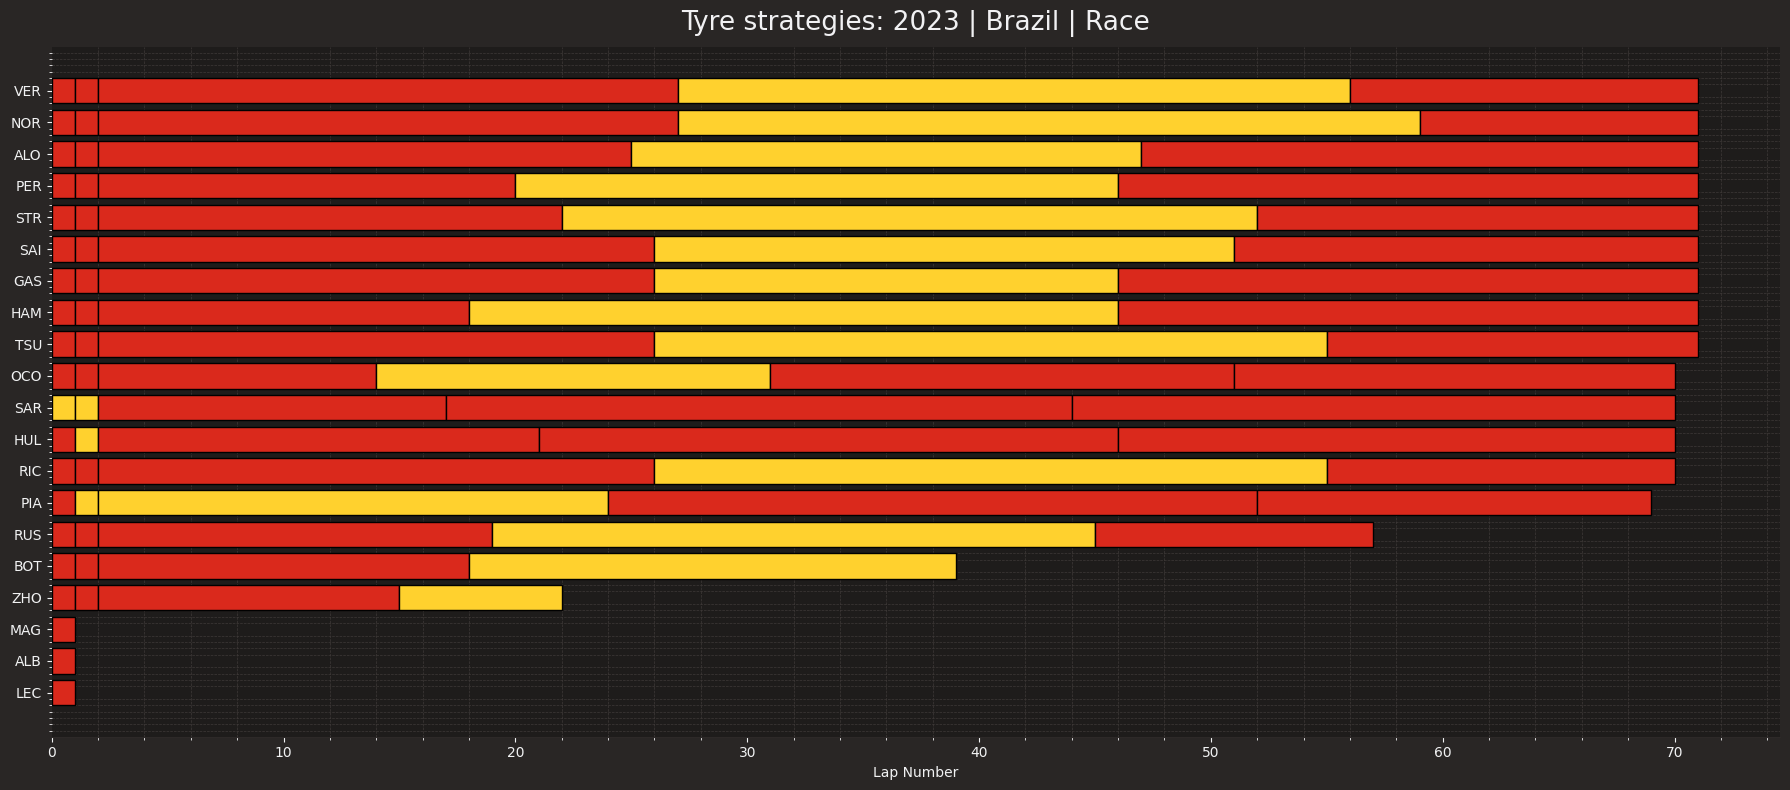

In [11]:
fig, ax = plt.subplots(figsize=(18, 8))

title = "Tyre strategies: "+str(year)+" | "+gp+" | "+event

plt.title(title)
plt.xlabel("Lap Number")
plt.grid(False)
ax.invert_yaxis()

for driver in all_drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=ff1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>